# **Khám phá và phân tích dữ liệu (EDA)**

## **Giới thiệu:**

Phân tích và khám phá dữ liệu của Iris Dataset
những đặc tính được sử dụng:

    Number of times pregnant

    Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    Diastolic blood pressure (mm Hg)

    Triceps skin fold thickness (mm)

    2-Hour serum insulin (mu U/ml)

    Body mass index (weight in kg/(height in m)^2)

    Diabetes pedigree function

    Age (years)

    Class variable (0 or 1)

mục đích là chẩn đoán xem người đó có bị tiểu đường hay không.

Những thư viện dùng cho việc triển khai dữ liệu:

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Trực quan hóa dữ liệu**

## **Load dữ liệu**

In [96]:
columms_names = ['Pegnancies',
                 'Glucose',
                 'BloodPressure',
                 'SkinThickness',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunc',
                 'Age',
                 'Outcome']
df = pd.read_csv("../data/pima-indians-diabetes.csv",names=columms_names)

## **Tổng quan về dữ liệu**

In [98]:
df.shape

(768, 9)

In [97]:
df.head(5)

,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dựa vào 5 dòng đầu tiên của dataset, ta có thể thấy một số dữ liệu vô lý như là Insulin, SkinThickness lại bằng 0 => đây là dữ liệu bị thiếu của tập dữ liệu.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pegnancies            768 non-null    int64  
 1   Glucose               768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   SkinThickness         768 non-null    int64  
 4   Insulin               768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   DiabetesPedigreeFunc  768 non-null    float64
 7   Age                   768 non-null    int64  
 8   Outcome               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Phân tích đơn biến**

### **Biến outcome**

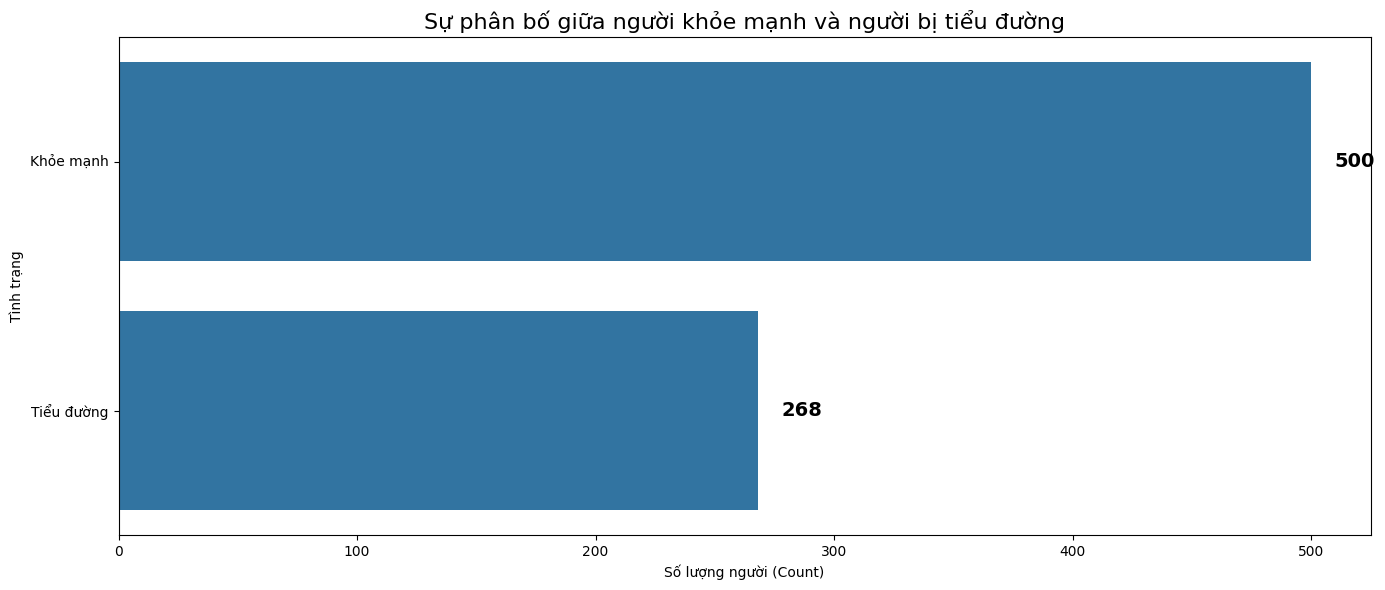

In [101]:
plt.figure(figsize=(14,6))

counts = df['Outcome'].value_counts()
labels = ['Khỏe mạnh', 'Tiểu đường']
ax = sns.barplot(x=counts.values, y=labels)
plt.title("Sự phân bố giữa người khỏe mạnh và người bị tiểu đường", fontsize=16)
plt.xlabel("Số lượng người (Count)")
plt.ylabel("Tình trạng")

for i, p in enumerate(ax.patches):
    width = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.annotate(f'{int(width)}', 
                (width + 10, y_pos),
                ha='left', va='center', 
                fontsize=14, color='black', 
                fontweight='bold')

plt.tight_layout()
plt.show()

- Outcome giữa người bị tiểu đường và không tiêu đường không cân bằng
- không an toàn để sử dụng nhiều phương pháp phân loại khác

### **Kiểm tra dữ liệu thiếu**

**Các cột dữ liệu không thể bằng 0**

In [102]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\nSố lượng giá trị 0 trong các cột chính:")
for col in cols_with_zero:
    print(f"{col}: {df[df[col] == 0].shape[0]}")


Số lượng giá trị 0 trong các cột chính:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


**Chuyển 0 thành NaN**

In [ ]:
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


Số lượng giá trị thiếu sau khi thay thế 0 bằng NaN:


**Biểu đồ giá trị thiếu**

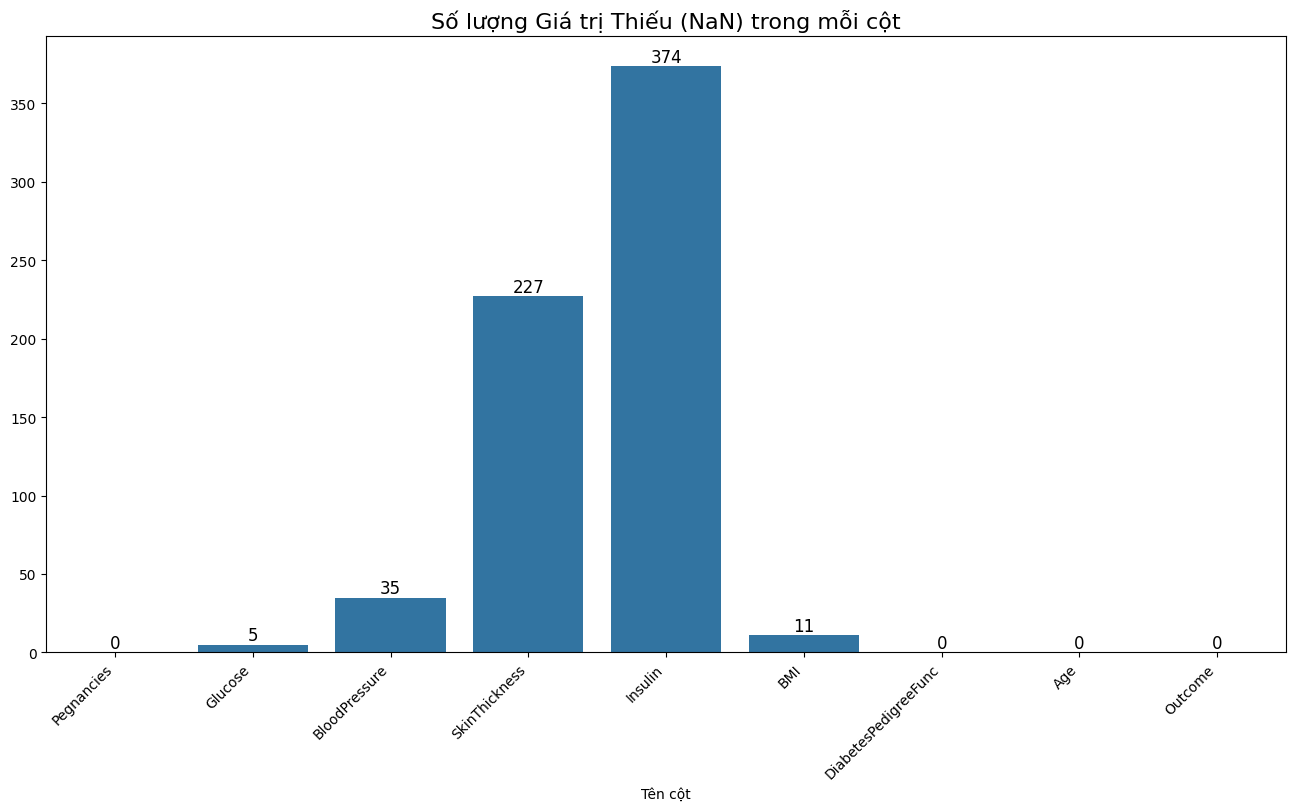

In [104]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.isna().sum().index,y=df.isna().sum().values)
plt.title('Số lượng Giá trị Thiếu (NaN) trong mỗi cột', fontsize=16)
plt.xlabel('Tên cột')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=12, color='black')


**Biểu đồ Histogram trước khi xử lý dữ liệu thiếu**

[Text(0.5, 1.0, 'Sự phân phối của SkinThickness')]

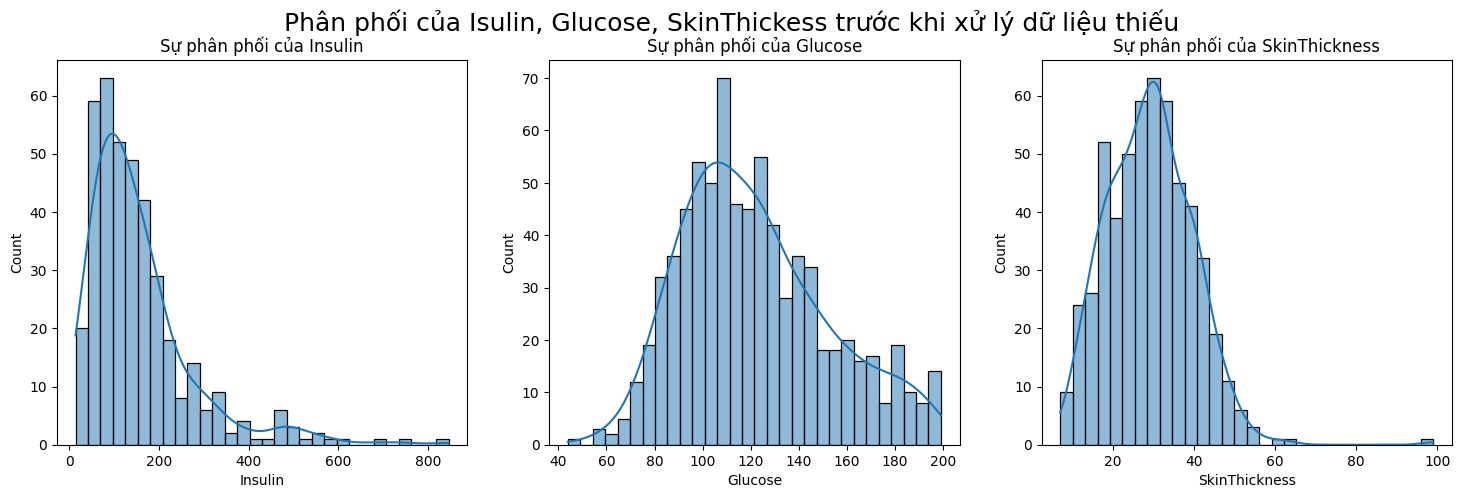

In [105]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
plt.suptitle('Phân phối của Isulin, Glucose, SkinThickess trước khi xử lý dữ liệu thiếu',fontsize=18)
sns.histplot(ax=ax[0], x=df['Insulin'], bins=30, kde=True).set(title="Sự phân phối của Insulin")
sns.histplot(ax=ax[1], x=df['Glucose'], bins=30, kde=True).set(title="Sự phân phối của Glucose")
sns.histplot(ax=ax[2], x=df['SkinThickness'], bins=30, kde=True).set(title="Sự phân phối của SkinThickness")

**Insulin:** Phân phối lệch phải cực mạnh (Right-Skewed). Cột tần suất tại giá trị 0 áp đảo hoàn toàn, cho thấy một lượng lớn dữ liệu thiếu được mã hóa là 0.

**Glucose:** Phân phối gần chuẩn (Near-Normal), nhưng có một lượng nhỏ các giá trị rất thấp (dưới 60), có thể là giá trị 0 hoặc ngoại lai.

**SkinThickness:** Phân phối lệch phải mạnh (Right-Skewed). Tương tự, có một cột tần suất rất cao tại 0, chỉ ra dữ liệu thiếu.

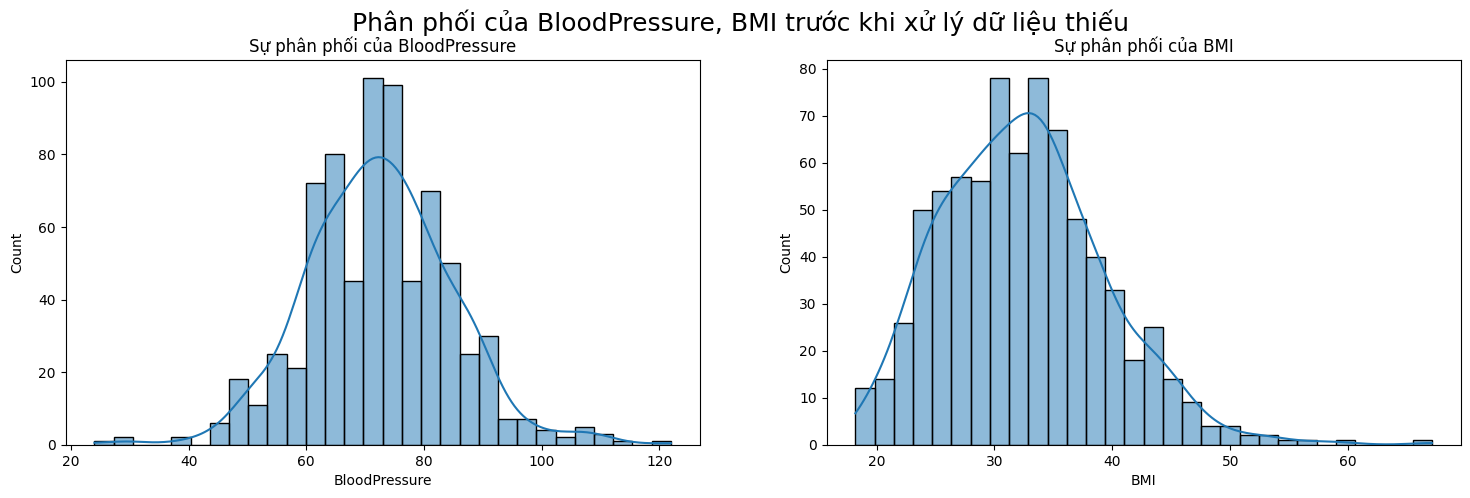

In [106]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
plt.suptitle('Phân phối của BloodPressure, BMI trước khi xử lý dữ liệu thiếu',fontsize=18)
sns.histplot(ax=ax[0], x=df['BloodPressure'], bins=30, kde=True).set(title="Sự phân phối của BloodPressure")
sns.histplot(ax=ax[1], x=df['BMI'], bins=30, kde=True).set(title="Sự phân phối của BMI")
b4miss = df.describe()

**BloodPressure:** Phân phối gần chuẩn (Near-Normal), có hình dạng chuông và khá đối xứng.Có một số giá trị rất thấp (dưới 40), có thể là giá trị 0 không hợp lệ hoặc ngoại lai.

**BMI**:  Phân phối gần chuẩn (Near-Normal), hơi lệch phải nhẹ (Right-Skewed).

### **Xử lý dữ liệu thiếu**

Qua các biểu đồ trên, ta thấy rằng có rất nhiều giá trị thiếu trong tập dữ liệu. Vì vậy, ta sẽ thay các giá trị thiếu đó bằng hàm median.

In [107]:
#Cột có giá trị thiếu
change_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[change_col] = df[change_col].fillna(df[change_col].median())
df.isna().sum()

Pegnancies              0
Glucose                 0
BloodPressure           0
SkinThickness           0
Insulin                 0
BMI                     0
DiabetesPedigreeFunc    0
Age                     0
Outcome                 0
dtype: int64

[Text(0.5, 1.0, 'Sự phân phối của SkinThickness')]

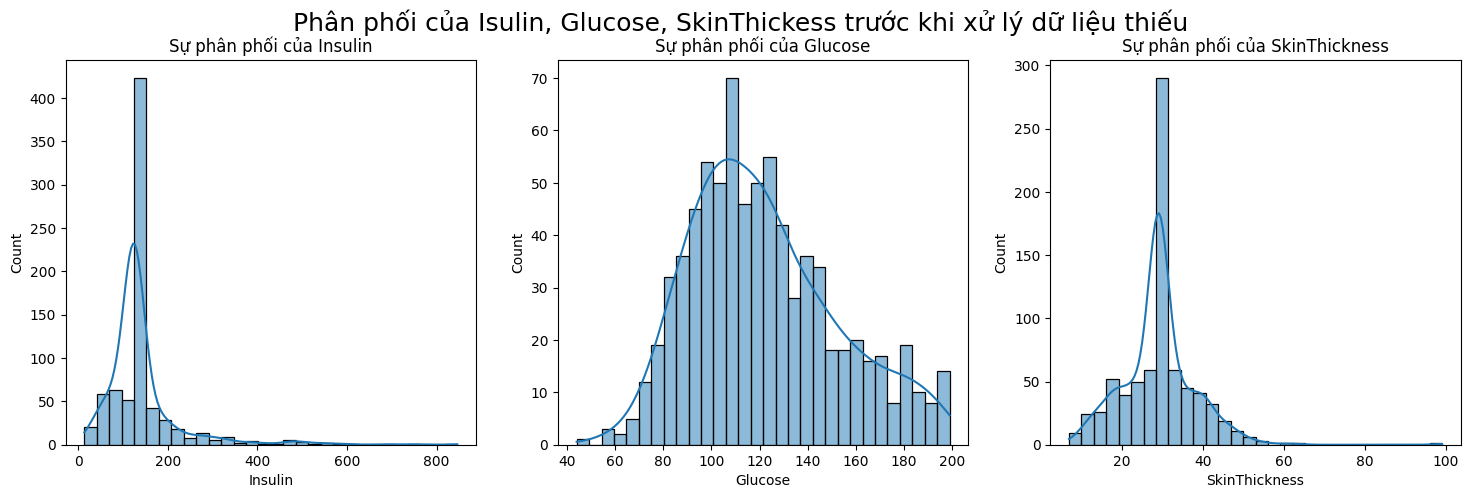

In [108]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
plt.suptitle('Phân phối của Isulin, Glucose, SkinThickess trước khi xử lý dữ liệu thiếu',fontsize=18)
sns.histplot(ax=ax[0], x=df['Insulin'], bins=30, kde=True).set(title="Sự phân phối của Insulin")
sns.histplot(ax=ax[1], x=df['Glucose'], bins=30, kde=True).set(title="Sự phân phối của Glucose")
sns.histplot(ax=ax[2], x=df['SkinThickness'], bins=30, kde=True).set(title="Sự phân phối của SkinThickness")

**Insulin:** So với khi chưa xử lý, biểu đồ vẫn lệch phải và cột giá trị 0 biến mất. Có một cột tần suất cao mới xuất hiện tại vị trí Median (~125)

**Glucose:** Các giá trị thấp được đẩy lên. Phân phối vẫn gần chuẩn, nhưng các cột thấp được lấp đầy, làm cho phân phối đối xứng hơn.

**SkinThickness:** Biểu đồ trở nên gần chuẩn hơn. Cột tần suất cao mới xuất hiện tại vị trí Median (~29.15), lấp đầy khoảng trống dữ liệu thiếu(mất đi cột cột tần suất giá trị 0).

[Text(0.5, 1.0, 'Sự phân phối của BMI')]

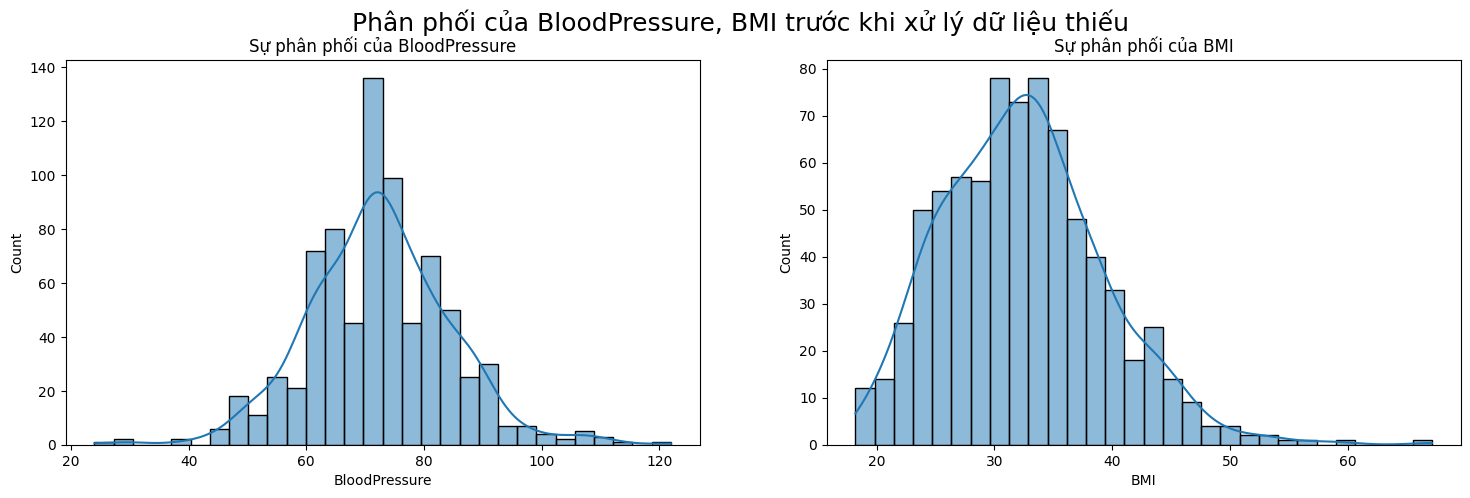

In [109]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
plt.suptitle('Phân phối của BloodPressure, BMI trước khi xử lý dữ liệu thiếu',fontsize=18)
sns.histplot(ax=ax[0], x=df['BloodPressure'], bins=30, kde=True).set(title="Sự phân phối của BloodPressure")
sns.histplot(ax=ax[1], x=df['BMI'], bins=30, kde=True).set(title="Sự phân phối của BMI")

BloodPressure và BMI do chỉ có một số ít giá trị thiếu => Biểu đồ không thay đổi.

**Thống kê mô tả cho tất cả các cột định lượng**

In [110]:
print("Trước khi xử lý giá trị thiếu")
display(b4miss)
print("Sau khi xử lý giá trị thiếu")
display(df.describe())

Trước khi xử lý giá trị thiếu


,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Sau khi xử lý giá trị thiếu


,Pegnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunc,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Glucose:**       Min tăng lên, Median giữ nguyên. Xử lý thành công giá trị 0.

**BloodPressure:**	Min tăng lên, Median giữ nguyên. Xử lý thành công giá trị 0.

**SkinThickness:**	Min tăng lên, Median thay đổi (từ 23.00 lên 29.11). Xử lý thành công và lấp đầy khoảng trống lớn tại 0.

**Insulin:**		Min tăng, Median thay đổi đáng kể (từ 30.50 lên 125.00). Đây là kết quả của việc lấp đầy số lượng lớn giá trị 0.

**BMI:**	        Min tăng, Median ít thay đổi. Xử lý thành công giá trị 0.

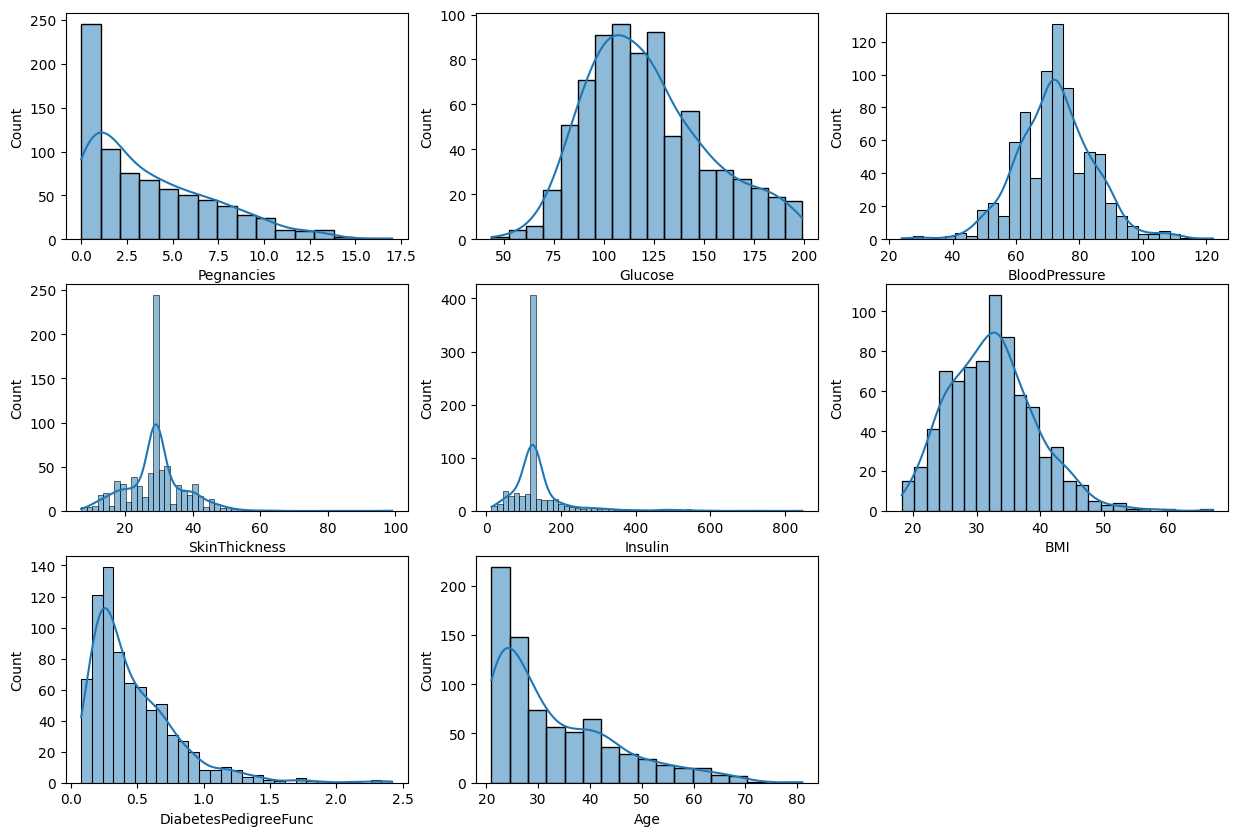

In [111]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col],kde=True)
plt.show()

## **Phân tích đa biến**

### **Glucose và Age**

Theo WHO, tuổi tác là một yếu tố khiến nguy cơ tăng đường huyết và bệnh tiểu đường tăng lên song với đó khi lớn tuổi, cơ thể có xu hướng tích tụ đường trong máu lâu dài, làm tăng chỉ số đường huyết. 

<Axes: title={'center': 'Biểu đồ phân tán của Glucose và Age dựa vào Outcome'}, xlabel='Glucose', ylabel='Age'>

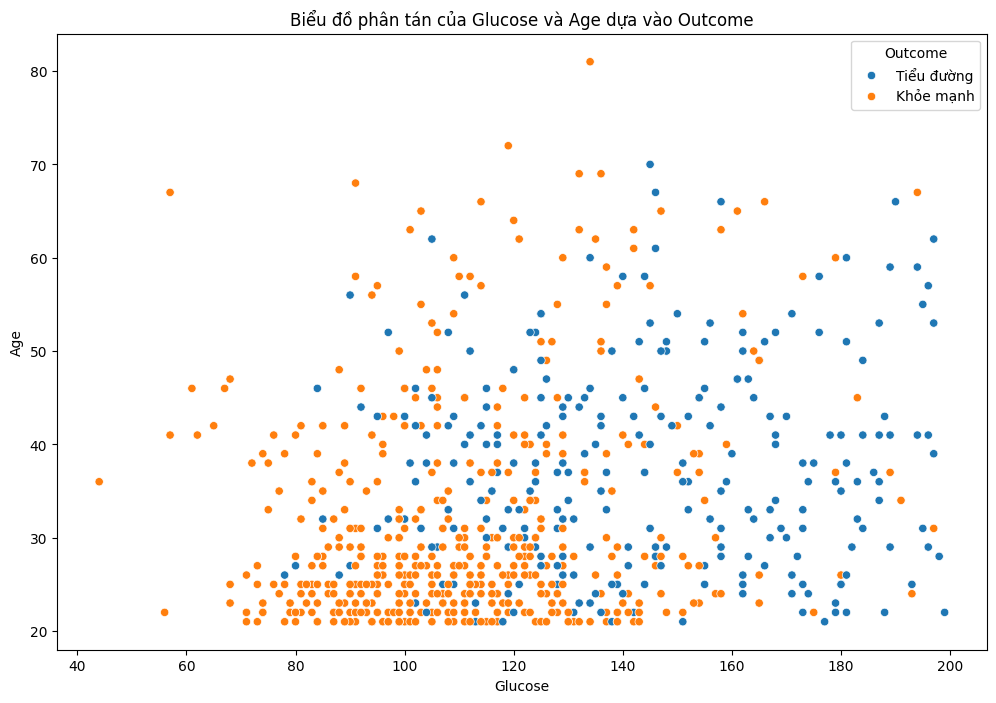

In [112]:
plt.figure(figsize=(12,8))
plt.title("Biểu đồ phân tán của Glucose và Age dựa vào Outcome")
sns.scatterplot(x=df['Glucose'],y=df['Age'],hue=df['Outcome'].map({0:'Khỏe mạnh',1:'Tiểu đường'}))

Đứng theo như WHO, độ tuổi khỏe mạnh tập trung mạnh ở khoảng <= 30 tuổi và mức Glucose <= 120

C:\Users\Keqing\AppData\Local\Temp\ipykernel_11372\2333109281.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, x=['Khỏe mạnh', 'Tiểu đường'], y=temp['Outcome'].value_counts(),palette=['#1f77b4', '#ff7f0e'])


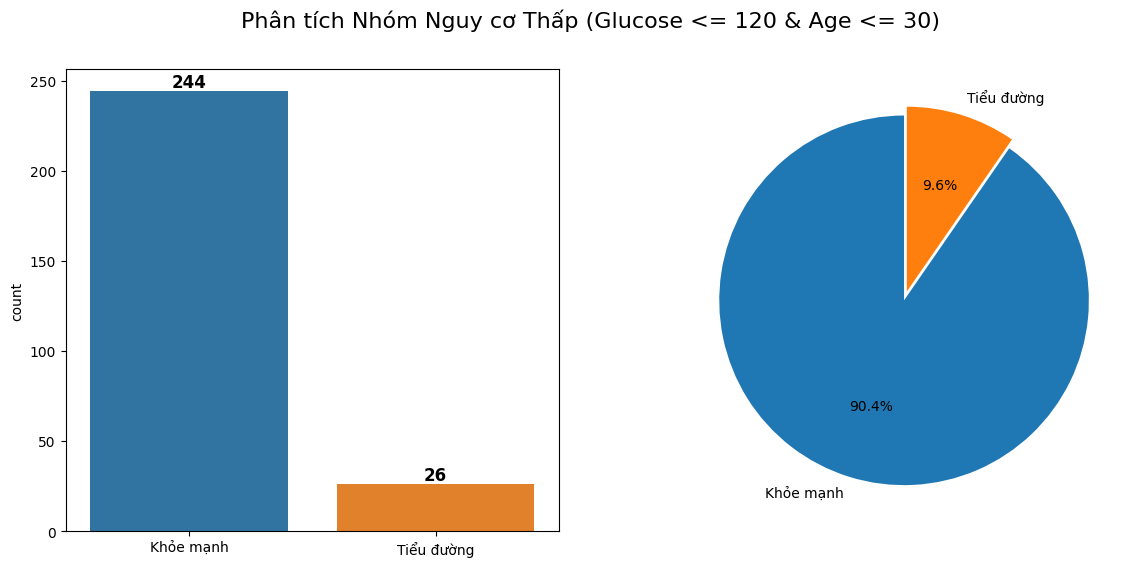

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

condition = (df['Glucose'] <= 120) & (df['Age'] <= 30)
temp = df[condition].copy() 
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

fig.suptitle('Phân tích Nhóm Nguy cơ Thấp (Glucose <= 120 & Age <= 30)', fontsize=16)
ax1 = axes[0] 
sns.barplot(ax=ax1, x=['Khỏe mạnh', 'Tiểu đường'], y=temp['Outcome'].value_counts(),palette=['#1f77b4', '#ff7f0e'])

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


ax2 = axes[1] 
ax2.pie(
    x=temp['Outcome'].value_counts(), 
    labels=labels, 
    autopct='%.1f%%', 
    startangle=90, 
    colors=['#1f77b4', '#ff7f0e'],
    explode=(0, 0.05)
)

plt.show()

Dựa vào điều kiện đã đưa ra thì số người khỏe mạnh gồm có 244 người chiếm 90.4% và người mắc tiểu đường là 26 người 9.6% còn lại.

Text(0.5, 1.0, 'số phần trăm người bị tiểu đường thõa điều kiện so với base')

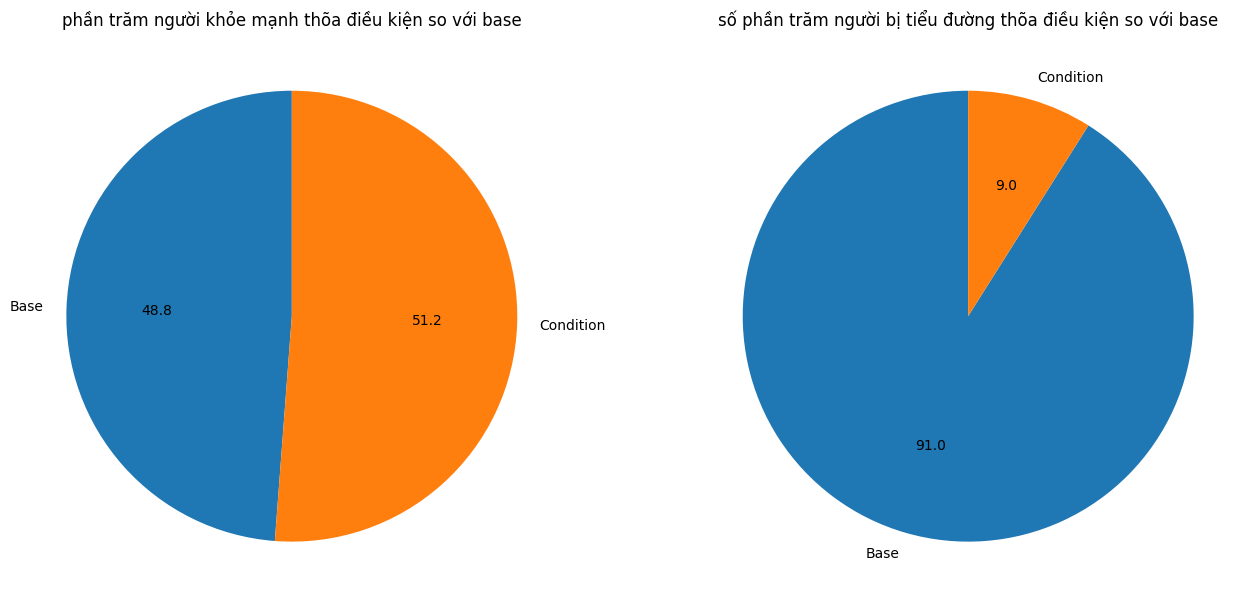

In [141]:
#Outcome = 0 only
healthy_only_base = df[df['Outcome'] == 0].copy() #Lấy những người khỏe mạnh trong data frame ban đầu
condition_on_healthy = (healthy_only_base['Glucose'] <= 120) & (healthy_only_base['Age'] <= 30) # điều kiện Glucose<=120 & Age <= 30
healthy_only_ideal = healthy_only_base[condition_on_healthy] #Lấy những người khỏe mạnh từ healthy_only_base sao đó thõa điều kiện
data_values1 = [len(healthy_only_ideal),(len(healthy_only_base)-len(healthy_only_ideal))] #Đếm số lượng trong data frame ideal và data frame tổng - ideal = risk

#Outcome = 1 only
diabetes_only_base = df[df['Outcome'] == 1].copy() 
condition_on_diabetes = (healthy_only_base['Glucose'] <= 120) & (healthy_only_base['Age'] <= 30) 
diabetes_only_risk = healthy_only_base[condition_on_healthy] 
data_values2 = [len(diabetes_only_risk),(len(diabetes_only_base)-len(diabetes_only_risk))] 

#Draw for Outcome = 0
fig, axes = plt.subplots(1,2,figsize=(16, 8))
ax1 = axes[0]
ax1.pie(x=data_values1,labels=['Base','Condition'],autopct='%.01f',startangle=90)
ax1.set_title('phần trăm người khỏe mạnh thõa điều kiện so với base')
#Draw for Outcome = 1
ax2 = axes[1]
ax2.pie(x=data_values2,labels=['Base','Condition'],autopct='%.01f',startangle=90)
ax2.set_title('số phần trăm người bị tiểu đường thõa điều kiện so với base')


So sánh với tập dữ liệu ban đầu thì ta thấy rằng: 

- Số người khỏe mạnh nằm trong khoảng Glucose <= 120 & Age <= 30 chiếm hơn 1 nửa trong tập dữ liệu chiếm 51.2% (244/500 người khỏe mạnh trong tập dữ liệu).

- Số người tiểu đường nằm trong khoảng điều kiện này thì chỉ chiếm c01 9% so với tập dữ liệu ban đầu (chỉ có 26/268 người bị tiểu đường).

=> có thể thấy tuổi tác + Glucose có mối tương quan mạnh đến Outcome.